In [1]:
#This creates a selenium browser session 

from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
import time
from selenium.webdriver.support.ui import WebDriverWait
import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar
Players = ["Jadon Sancho 20/21","Rashford 18/19","Rashford 19/20","Rashford 20/21","Greenwood 19/20","Greenwood 20/21","Dan James 19/20","Martial 17/18","Martial 18/19"]
data = {}
data["Players"] = Players
Goals,xA,Prog_Passes,Prog_Carries,Dribbles_Comp,PPA,CrsPA,CPA = [],[],[],[],[],[],[],[]
browser = webdriver.Firefox()


In [2]:
#This functions extracts the required stats data for each player from their page and season required
def extract_data(year):
    browser.implicitly_wait(4)
#Click on AGREE for the popup
    element = browser.find_elements_by_xpath("//button[@aria-label = 'AGREE']")
    if len(element) != 0:
        WebDriverWait(browser,10).until(EC.element_to_be_clickable((By.XPATH,"//button[@aria-label='AGREE']"))).click()
    else:
        time.sleep(1)
#This checks if the per90 button has been clicked for any tables yet
    browser.implicitly_wait(4)
    check = browser.find_elements_by_xpath("//li[@class = 'modified']")
#If they haven't then click on the buttons we need to obtain our data
    if len(check) == 0:
        buttons = browser.find_elements_by_xpath("//button[contains(@tip, 'Convert the season stats in the table below' )]")
        buttons[0].click()
        time.sleep(1)
        buttons[2].click()
        time.sleep(2)
        buttons[6].click()
    else:
        time.sleep(1)
        browser.implicitly_wait(2)
#This appends the stats required for a player in a season to the required list 
    value_goals = browser.find_elements_by_xpath("//td[@data-stat = 'goals']")
    Goals.append(value_goals[year].text)

    value_xa = browser.find_elements_by_xpath("//td[@data-stat = 'xa']")
    xA.append(value_xa[year].text)

    value_prog_passes = browser.find_elements_by_xpath("//td[@data-stat = 'progressive_passes']")
    Prog_Passes.append(value_prog_passes[year].text)

    value_prog_carries = browser.find_elements_by_xpath("//td[@data-stat = 'progressive_carries']")
    Prog_Carries.append(value_prog_carries[year].text)

    value_dribbles = browser.find_elements_by_xpath("//td[@data-stat = 'dribbles_completed']")
    Dribbles_Comp.append(value_dribbles[year].text)

    value_PPA = browser.find_elements_by_xpath("//td[@data-stat = 'passes_into_penalty_area']")
    PPA.append(value_PPA[year].text)

    value_crosses = browser.find_elements_by_xpath("//td[@data-stat = 'crosses_into_penalty_area']")
    CrsPA.append(value_crosses[year].text)

    value_CPA = browser.find_elements_by_xpath("//td[@data-stat = 'carries_into_penalty_area']")
    CPA.append(value_CPA[year].text)

In [3]:
#Looping through we crawl through each site and each index matching our season in the table on site
for i in range(5):
    if i == 0:
        browser.get("https://fbref.com/en/players/dbf053da/Jadon-Sancho")
        extract_data(5)
    elif i == 1:
        browser.get("https://fbref.com/en/players/a1d5bd30/Marcus-Rashford")
        extract_data(3)
        extract_data(4)
        extract_data(5)
    elif i == 2:
        browser.get("https://fbref.com/en/players/58eee997/Mason-Greenwood")
        extract_data(3)
        extract_data(4)
    elif i == 3:
        browser.get("https://fbref.com/en/players/c931d9f9/Daniel-James")
        extract_data(3)
    else:
        browser.get("https://fbref.com/en/players/8b788c01/Anthony-Martial")
        extract_data(6)
        extract_data(7)

In [4]:
print(Goals, xA, Prog_Passes, Prog_Carries, Dribbles_Comp, PPA, CrsPA, CPA)

['0.35', '0.39', '0.58', '0.34', '0.68', '0.35', '0.12', '0.51', '0.56'] ['0.30', '0.17', '0.16', '0.11', '0.05', '0.09', '0.16', '0.29', '0.16'] ['6.46', '2.28', '4.46', '2.96', '1.84', '2.08', '2.48', '3.64', '4.33'] ['10.4', '4.75', '5.61', '6.76', '5.65', '6.68', '6.04', '11.8', '9.78'] ['3.97', '1.85', '2.45', '2.72', '1.43', '1.88', '0.89', '2.44', '1.72'] ['3.58', '0.93', '2.28', '1.73', '0.61', '0.84', '1.19', '1.59', '1.67'] ['0.22', '0.12', '0.14', '0.19', '0.07', '0.15', '0.30', '0.28', '0.22'] ['2.23', '1.00', '1.05', '1.88', '1.22', '1.73', '1.09', '2.10', '2.56']


In [86]:
Names = ["Goals", "xAssist", "Prog_Passes", "Prog_Carries", "Dribbles_Comp", "Passes into PA", "Crosses into PA", "Carries into PA"]
List_values = [Goals, xA, Prog_Passes, Prog_Carries, Dribbles_Comp, PPA, CrsPA, CPA]

In [87]:
#This adds stats with their Player keys to a dictionary and creates a dataframe from it
for i in range(len(Names)):
    data[Names[i]] = List_values[i]

Extra = ["Players"] + Names
subdf = pd.DataFrame(data,columns=Extra)

In [88]:
subdf

,Players,Goals,xAssist,Prog_Passes,Prog_Carries,Dribbles_Comp,Passes into PA,Crosses into PA,Carries into PA
0,Jadon Sancho 20/21,0.35,0.30,6.46,10.4,3.97,3.58,0.22,2.23
1,Rashford 18/19,0.39,0.17,2.28,4.75,1.85,0.93,0.12,1.00
2,Rashford 19/20,0.58,0.16,4.46,5.61,2.45,2.28,0.14,1.05
3,Rashford 20/21,0.34,0.11,2.96,6.76,2.72,1.73,0.19,1.88
4,Greenwood 19/20,0.68,0.05,1.84,5.65,1.43,0.61,0.07,1.22
5,Greenwood 20/21,0.35,0.09,2.08,6.68,1.88,0.84,0.15,1.73
6,Dan James 19/20,0.12,0.16,2.48,6.04,0.89,1.19,0.30,1.09
7,Martial 17/18,0.51,0.29,3.64,11.8,2.44,1.59,0.28,2.10
8,Martial 18/19,0.56,0.16,4.33,9.78,1.72,1.67,0.22,2.56


In [156]:
#This particular dataframe contains the below seasons only but can be changed to any player scraped and put in our original dataframe
Rashford_1 = subdf[(subdf["Players"]== "Jadon Sancho 20/21")| (subdf["Players"] == "Martial 17/18")]

In [157]:
Rashford_1

,Players,Goals,xAssist,Prog_Passes,Prog_Carries,Dribbles_Comp,Passes into PA,Crosses into PA,Carries into PA
0,Jadon Sancho 20/21,0.35,0.30,6.46,10.4,3.97,3.58,0.22,2.23
7,Martial 17/18,0.51,0.29,3.64,11.8,2.44,1.59,0.28,2.10


In [158]:
#Where the plotting begins. The minimum value and maximum value for each column in our new dataframe is obtained and decreased or increased by 25 percent for scale

ranges = []
for x in Names:
    min_val = min(Rashford_1[x])
    min_val = float(min_val)
    min_val = min_val*.25
    
    
    max_val = max(Rashford_1[x])
    max_val = float(max_val)
    max_val += max_val*.25
    ranges.append((min_val,max_val))

In [159]:

#As we are plotting Sancho against any player's season in our dataframe here. We make a list for his row and only add the stats to it. 
Sancho_values = list(subdf.loc[0])
Sancho_values = Sancho_values[1:]
#It is then converted to float. Repeat for the second player season to be compared to
Sancho_values = map(float,Sancho_values)
Sancho_values = list(Sancho_values)
Second_values = list(subdf.loc[7])
Second_values = Second_values[1:]
Second_values = map(float,Second_values)
Second_values = list(Second_values)
Values = [Sancho_values,Second_values]
Values

[[0.35, 0.3, 6.46, 10.4, 3.97, 3.58, 0.22, 2.23],
 [0.51, 0.29, 3.64, 11.8, 2.44, 1.59, 0.28, 2.1]]

In [160]:
#The title data for Sancho and the player we compare to. Once again can be changed to the player you are making a radar chart of
title = dict(
    title_name = "Sancho 20/21",
    subtitle_name = "Game Time: 22.9 90s",
    title_color = "black",
    subtitle_color = "blue",
    title_name_2 = "Martial 17/18",
    subtitle_name_2 = "Game Time: 17.6 90s",
    subtitle_color_2 = "blue",
    title_color_2 = "red",
    title_fontsize = 20
)


endnote = "Created by u/Crimsonking123\nAll data is p90\ndata via FBREF"

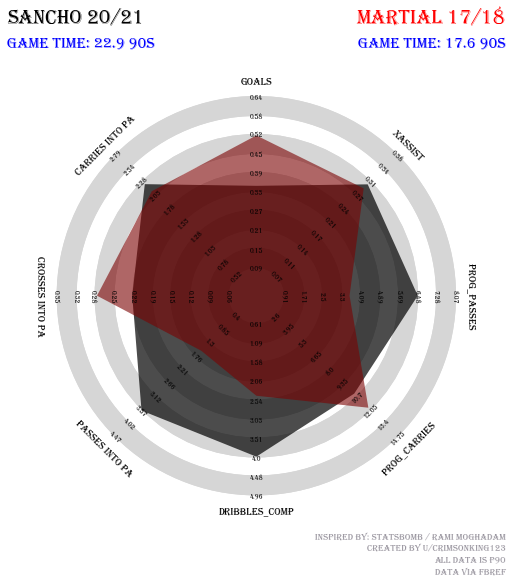

In [174]:
#Import soccerplots and extract our generated radar chart to a file
from soccerplots.utils import add_image
radar = Radar(fontfamily = "Algerian")


fig,ax = radar.plot_radar(ranges = ranges,params = Names, values = Values,
                          radar_color = ["black","#7B0101"],
                          alphas = [.70,.6],title = title, endnote = endnote,
                          compare = True,
                          filename = "Downloads/martial1718.jpg"
                         )

# fig = add_image(image='Downloads/233049.png', fig=fig, left=0.32, bottom=0.75, width=0.1, height=0.075)
# fig = add_image(image='Downloads/martial.png', fig=fig, left=0.608, bottom=0.75, width=0.1, height=0.075)

# fig = add_image(image="Downloads/utd.png", fig=fig, left=0.464, bottom=0.81, width=0.1, height=0.075)

0.0875

NameError: name 'soccerplots' is not defined